C:\Users\sebas\better-fftw\src\betterfftw\interface.py:562: UserWarning: Note: SciPy FFT acceleration not available: Unknown backend numpy
  warnings.warn(f"Note: SciPy FFT acceleration not available: {str(e)}")


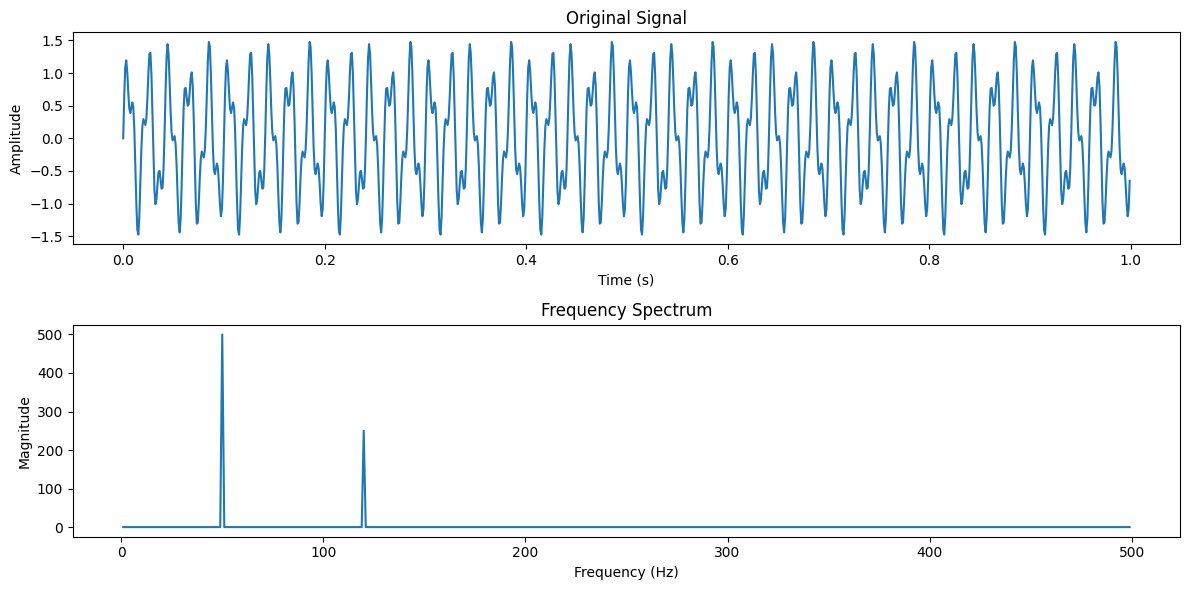

In [18]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import betterfftw
import time

# Make all NumPy/SciPy FFT calls use BetterFFTW (optional but recommended)
betterfftw.use_as_default()

# Generate a simple signal (sum of two sine waves)
sample_rate = 1000  # Hz
duration = 1.0      # seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
freq1, freq2 = 50, 120  # Hz
signal = np.sin(2 * np.pi * freq1 * t) + 0.5 * np.sin(2 * np.pi * freq2 * t)

# Compute FFT using NumPy's interface (which now uses BetterFFTW under the hood)
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/sample_rate)

# Plot the signal and its frequency spectrum
plt.figure(figsize=(12, 6))

# Plot original signal
plt.subplot(211)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot frequency spectrum (only positive frequencies)
plt.subplot(212)
positive_freq_idx = fft_freq > 0
plt.plot(fft_freq[positive_freq_idx], np.abs(fft_result[positive_freq_idx]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.tight_layout()
plt.show()

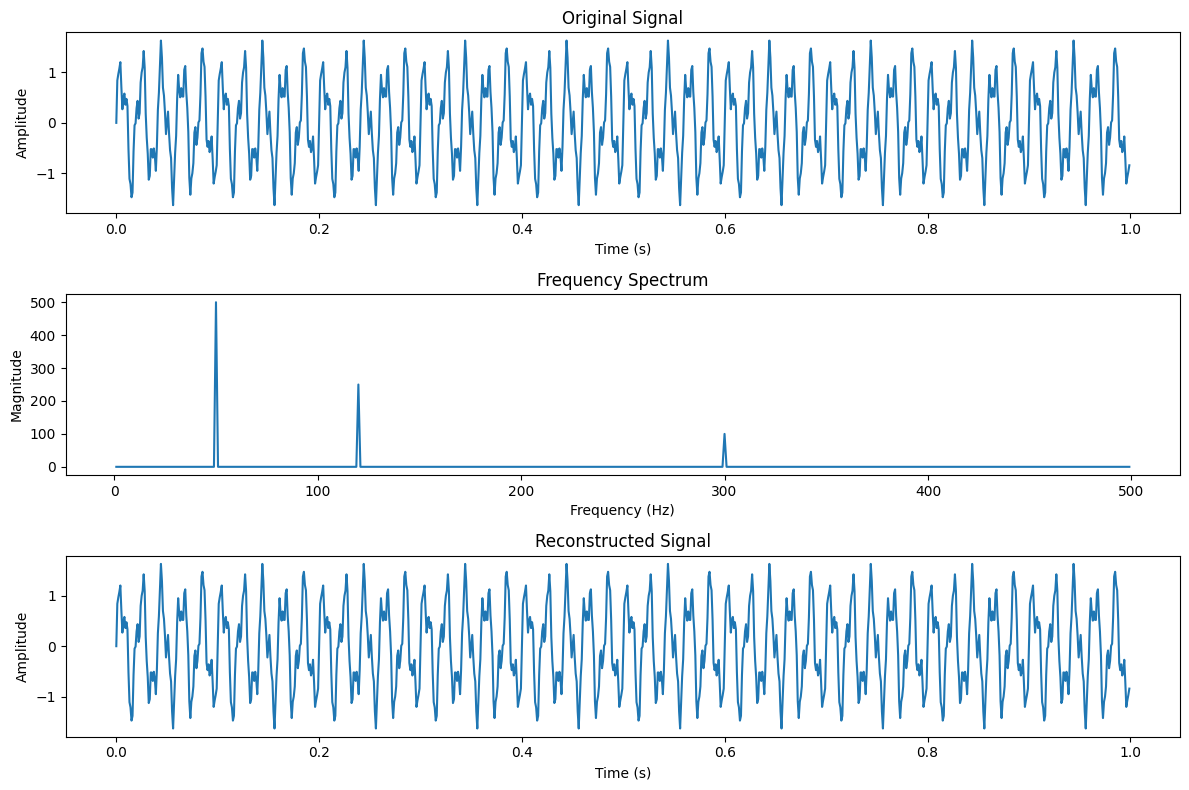

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import betterfftw

# Make all NumPy/SciPy FFT calls use BetterFFTW (optional but recommended)
betterfftw.use_as_default()

# Generate a more complex signal (sum of three sine waves)
sample_rate = 1000  # Hz
duration = 1.0      # seconds
t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
freq1, freq2, freq3 = 50, 120, 300  # Hz
signal = (np.sin(2 * np.pi * freq1 * t) +
          0.5 * np.sin(2 * np.pi * freq2 * t) +
          0.2 * np.sin(2 * np.pi * freq3 * t))

# Compute FFT using NumPy's interface (which now uses BetterFFTW under the hood)
fft_result = np.fft.fft(signal)
fft_freq = np.fft.fftfreq(len(signal), 1/sample_rate)

# Perform inverse FFT to reconstruct the signal
reconstructed_signal = np.fft.ifft(fft_result)

# Plot the original and reconstructed signals
plt.figure(figsize=(12, 8))

# Plot original signal
plt.subplot(311)
plt.plot(t, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot frequency spectrum (only positive frequencies)
plt.subplot(312)
positive_freq_idx = fft_freq > 0
plt.plot(fft_freq[positive_freq_idx], np.abs(fft_result[positive_freq_idx]))
plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

# Plot reconstructed signal
plt.subplot(313)
plt.plot(t, reconstructed_signal.real)  # Use .real to avoid small imaginary parts due to numerical errors
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Successfully imported BetterFFTW version: 0.1.0

Test 1: Basic 1D FFT
Results match with NumPy: True


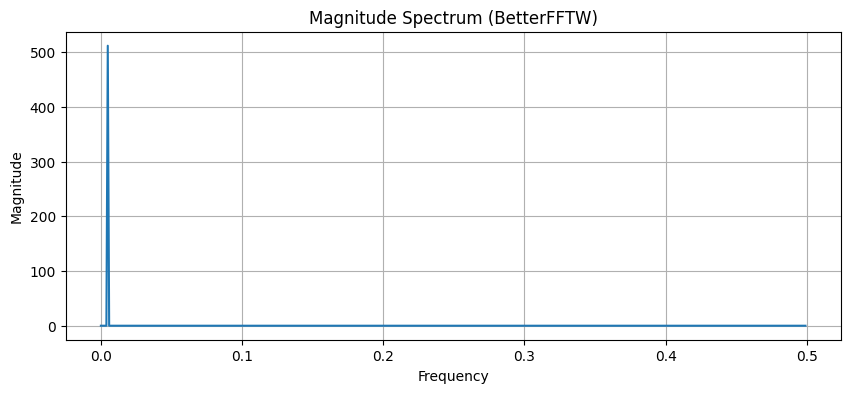


Test 2: 2D FFT
Results match with NumPy: True


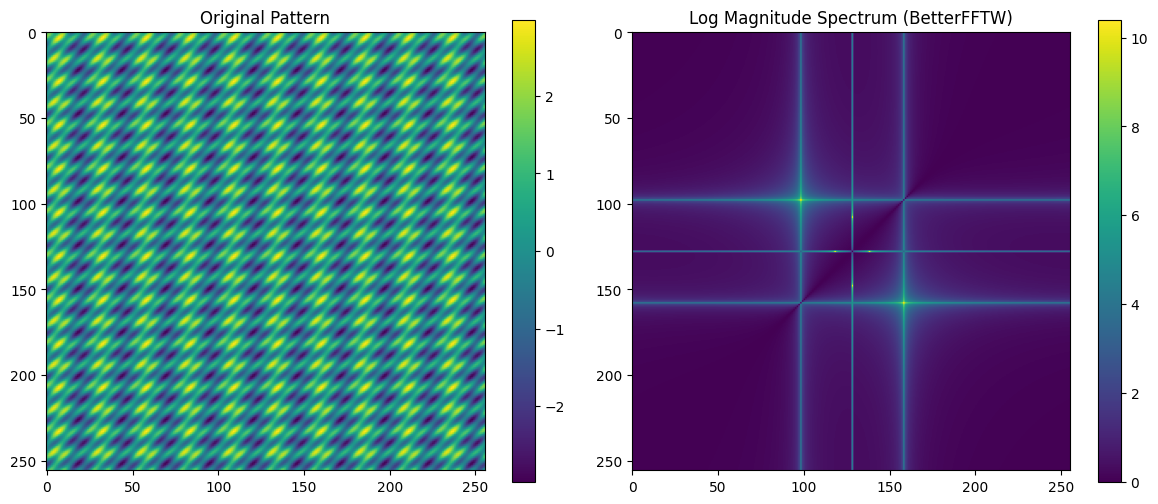


Test 3: NumPy API replacement
Set BetterFFTW as default FFT implementation
NumPy FFT using BetterFFTW successfully: True


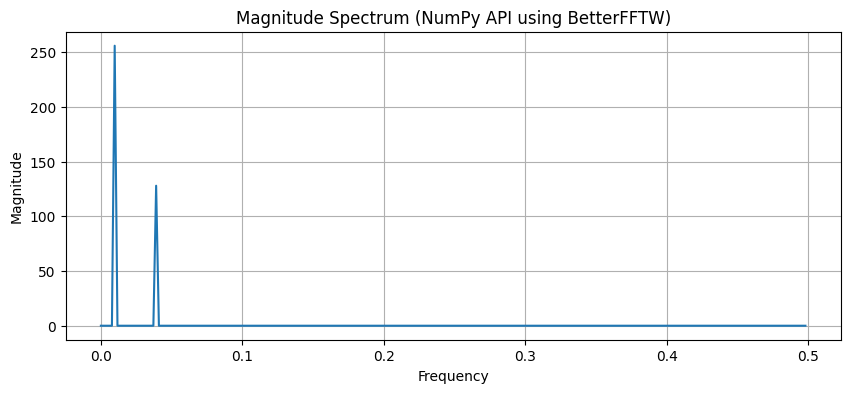

Restored default NumPy implementation

Test 4: Plan optimization for repeated transforms
Before stats: {'total_plans': 3, 'estimated_plans': 3, 'measured_plans': 0, 'patient_plans': 0, 'total_calls': 4, 'unique_shapes': 3, 'pending_optimizations': 0, 'background_optimizing': False}
After stats: {'total_plans': 4, 'estimated_plans': 3, 'measured_plans': 1, 'patient_plans': 0, 'total_calls': 14, 'unique_shapes': 3, 'pending_optimizations': 0, 'background_optimizing': True}
Total calls: 14
Cache hits: 0


In [21]:
# Basic test for BetterFFTW package
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to sys.path if needed
# Adjust this path to where your package is located
# sys.path.append('/path/to/better-fftw')

try:
    # Try importing the package
    import betterfftw
    print(f"Successfully imported BetterFFTW version: {betterfftw.__version__}")
except ImportError as e:
    print(f"Failed to import BetterFFTW: {e}")
    # if you're getting errors, make sure you've installed the dependencies:
    # pip install numpy pyfftw psutil
    sys.exit(1)

# Test 1: Basic 1D FFT functionality
print("\nTest 1: Basic 1D FFT")
try:
    # Create a simple sine wave
    n = 1024  # power of 2 for efficient FFT
    t = np.linspace(0, 1, n, endpoint=False)
    freq = 5  # frequency of the sine wave
    x = np.sin(2 * np.pi * freq * t)
    
    # Compute FFT using BetterFFTW
    X_bfft = betterfftw.fft(x)
    
    # Compute FFT using NumPy for comparison
    X_np = np.fft.fft(x)
    
    # Check if results are close
    is_close = np.allclose(X_bfft, X_np)
    print(f"Results match with NumPy: {is_close}")
    
    # Plot the magnitude spectrum
    plt.figure(figsize=(10, 4))
    freqs = np.fft.fftfreq(n)
    plt.plot(freqs[:n//2], np.abs(X_bfft[:n//2]))
    plt.title('Magnitude Spectrum (BetterFFTW)')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"Test 1 failed: {e}")

# Test 2: 2D FFT with an image-like array
print("\nTest 2: 2D FFT")
try:
    # Create a 2D test pattern with a few sine waves
    size = 256  # power of 2
    y, x = np.mgrid[-1:1:size*1j, -1:1:size*1j]
    # Create a pattern with a few frequency components
    z = (np.sin(5 * 2 * np.pi * x) + 
         np.sin(10 * 2 * np.pi * y) + 
         np.sin(15 * 2 * np.pi * (x + y)))
    
    # Compute 2D FFT using BetterFFTW
    Z_bfft = betterfftw.fft2(z)
    
    # Compute 2D FFT using NumPy for comparison
    Z_np = np.fft.fft2(z)
    
    # Check if results are close
    is_close = np.allclose(Z_bfft, Z_np)
    print(f"Results match with NumPy: {is_close}")
    
    # Plot the original and the magnitude spectrum
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    plt.imshow(z, cmap='viridis')
    plt.title('Original Pattern')
    plt.colorbar()
    
    plt.subplot(122)
    # Log scale for better visualization, center the zero frequency
    spectrum = np.fft.fftshift(np.abs(Z_bfft))
    plt.imshow(np.log1p(spectrum), cmap='viridis')
    plt.title('Log Magnitude Spectrum (BetterFFTW)')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Test 2 failed: {e}")

# Test 3: Use with NumPy API replacement
print("\nTest 3: NumPy API replacement")
try:
    # Enable BetterFFTW as the default FFT implementation
    betterfftw.use_as_default()
    print("Set BetterFFTW as default FFT implementation")
    
    # Create simple data
    n = 512
    t = np.linspace(0, 1, n, endpoint=False)
    x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 20 * t)
    
    # Now using numpy.fft should actually use BetterFFTW
    X_np = np.fft.fft(x)
    
    # And compare with direct BetterFFTW call
    X_bfft = betterfftw.fft(x)
    
    # They should be identical
    is_identical = np.array_equal(X_np, X_bfft)
    print(f"NumPy FFT using BetterFFTW successfully: {is_identical}")
    
    # Plot the result
    plt.figure(figsize=(10, 4))
    freqs = np.fft.fftfreq(n)
    plt.plot(freqs[:n//2], np.abs(X_np[:n//2]))
    plt.title('Magnitude Spectrum (NumPy API using BetterFFTW)')
    plt.xlabel('Frequency')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()
    
    # Restore default implementation
    betterfftw.restore_default()
    print("Restored default NumPy implementation")
except Exception as e:
    print(f"Test 3 failed: {e}")

# Test 4: Test reuse of same shape with plan optimization
print("\nTest 4: Plan optimization for repeated transforms")
try:
    # Get some stats before
    before_stats = betterfftw.get_stats()
    print(f"Before stats: {before_stats}")
    
    # Create sample data
    n = 1024
    data = np.random.random(n) + 1j * np.random.random(n)
    
    # Run the same FFT multiple times to trigger plan optimization
    for i in range(10):
        result = betterfftw.fft(data)
    
    # Get stats after
    after_stats = betterfftw.get_stats()
    print(f"After stats: {after_stats}")
    
    # Check if the cache was used
    if after_stats.get('cache_size', 0) > before_stats.get('cache_size', 0):
        print("Plan caching is working")
    
    # Let's see if there are any optimized plans
    print(f"Total calls: {after_stats.get('total_calls', 0)}")
    print(f"Cache hits: {after_stats.get('cache_hits', 0)}")
    
except Exception as e:
    print(f"Test 4 failed: {e}")

=== BetterFFTW Comprehensive Testing Suite ===
Successfully imported BetterFFTW version: 0.1.0

=== Running Test: Basic 1D FFT ===
  Size 16: ✓
  Size 100: ✓
  Size 256: ✓
  Size 511: ✓
  Size 1024: ✓
  Size 2047: ✓
✓ PASSED: Basic 1D FFT

=== Running Test: 2D FFT ===
  Size 32x32: ✓
  Size 100x100: ✓
  Size 128x64: ✓
  Size 200x150: ✓
✓ PASSED: 2D FFT

=== Running Test: N-dimensional FFT ===
  Shape (16, 16, 16): ✓
  Shape (8, 8, 8, 8): ✓
✓ PASSED: N-dimensional FFT

=== Running Test: Real FFT (RFFT) ===
  1D RFFT: ✓
  2D RFFT: ✓
  ND RFFT: ✓
✓ PASSED: Real FFT (RFFT)

=== Running Test: Inverse FFT ===
  1D IFFT: ✓
  2D IFFT: ✓
  ND IFFT: ✓
✓ PASSED: Inverse FFT

=== Running Test: Inverse Real FFT ===
  1D IRFFT: ✓
  2D IRFFT: ✓
  ND IRFFTN: ✓
✓ PASSED: Inverse Real FFT

=== Running Test: Normalization Options ===
  'ortho' normalization: ✓
  Normalization effect verification: ✓
✓ PASSED: Normalization Options

=== Running Test: Non-default Axis Parameter ===
  FFT along axis 0: ✓
  F

Traceback (most recent call last):
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_6288\689800684.py", line 31, in run_test
    test_func()
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_6288\689800684.py", line 474, in test_configuration
    current_config = betterfftw.configure(config_dict)
                     ^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'betterfftw' has no attribute 'configure'
Traceback (most recent call last):
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_6288\689800684.py", line 31, in run_test
    test_func()
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_6288\689800684.py", line 520, in test_planning_module
    assert all(opt >= orig for opt, orig in zip(optimal_shape, original_shape)), "Optimal shape has smaller dimensions"
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: Optimal shape has smaller dimensions


In [ ]:
# Comprehensive tests for BetterFFTW package
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os
import gc

# Force garbage collection to start clean
gc.collect()

print("=== BetterFFTW Comprehensive Testing Suite ===")

try:
    # Try importing the package
    import betterfftw
    print(f"Successfully imported BetterFFTW version: {betterfftw.__version__}")
except ImportError as e:
    print(f"Failed to import BetterFFTW: {e}")
    print("Make sure you've installed dependencies: pip install numpy pyfftw psutil")
    sys.exit(1)

# Test infrastructure
test_passed = 0
test_failed = 0

def run_test(test_name, test_func):
    global test_passed, test_failed
    print(f"\n=== Running Test: {test_name} ===")
    try:
        test_func()
        test_passed += 1
        print(f"✓ PASSED: {test_name}")
    except Exception as e:
        test_failed += 1
        print(f"✗ FAILED: {test_name}")
        print(f"Error: {str(e)}")
        import traceback
        traceback.print_exc()

# Test 1: Basic 1D FFT for different array sizes
def test_basic_1d_fft():
    # Test various array sizes including powers of 2 and non-powers of 2
    for n in [16, 100, 256, 511, 1024, 2047]:
        t = np.linspace(0, 1, n, endpoint=False)
        x = np.sin(2 * np.pi * 5 * t)
        
        X_bfft = betterfftw.fft(x)
        X_np = np.fft.fft(x)
        
        assert np.allclose(X_bfft, X_np, atol=1e-10), f"FFT results don't match for size {n}"
        print(f"  Size {n}: ✓")

run_test("Basic 1D FFT", test_basic_1d_fft)

# Test 2: 2D FFT for different array sizes
def test_2d_fft():
    # Test various 2D array sizes
    for h, w in [(32, 32), (100, 100), (128, 64), (200, 150)]:
        # Create a 2D pattern
        y, x = np.mgrid[-1:1:h*1j, -1:1:w*1j]
        z = np.sin(5 * 2 * np.pi * x) * np.cos(3 * 2 * np.pi * y)
        
        Z_bfft = betterfftw.fft2(z)
        Z_np = np.fft.fft2(z)
        
        assert np.allclose(Z_bfft, Z_np, atol=1e-10), f"FFT2 results don't match for size {h}x{w}"
        print(f"  Size {h}x{w}: ✓")

run_test("2D FFT", test_2d_fft)

# Test 3: Multi-dimensional (N-dimensional) FFT
def test_nd_fft():
    # Test 3D and 4D FFTs
    for shape in [(16, 16, 16), (8, 8, 8, 8)]:
        # Create N-dimensional array
        a = np.random.random(shape)
        
        A_bfft = betterfftw.fftn(a)
        A_np = np.fft.fftn(a)
        
        assert np.allclose(A_bfft, A_np, atol=1e-10), f"FFTN results don't match for shape {shape}"
        print(f"  Shape {shape}: ✓")

run_test("N-dimensional FFT", test_nd_fft)

# Test 4: Real FFT (RFFT) operations
def test_real_fft():
    # Test real FFT for various dimensions
    # 1D RFFT
    x = np.random.random(1024)
    X_bfft = betterfftw.rfft(x)
    X_np = np.fft.rfft(x)
    assert np.allclose(X_bfft, X_np, atol=1e-10), "RFFT results don't match"
    print("  1D RFFT: ✓")
    
    # 2D RFFT
    z = np.random.random((128, 128))
    Z_bfft = betterfftw.rfft2(z)
    Z_np = np.fft.rfft2(z)
    assert np.allclose(Z_bfft, Z_np, atol=1e-10), "RFFT2 results don't match"
    print("  2D RFFT: ✓")
    
    # ND RFFT
    a = np.random.random((32, 32, 32))
    A_bfft = betterfftw.rfftn(a)
    A_np = np.fft.rfftn(a)
    assert np.allclose(A_bfft, A_np, atol=1e-10), "RFFTN results don't match"
    print("  ND RFFT: ✓")

run_test("Real FFT (RFFT)", test_real_fft)

# Test 5: Inverse FFT operations
def test_inverse_fft():
    # 1D IFFT
    x = np.random.random(1024) + 1j * np.random.random(1024)
    x_back_bfft = betterfftw.ifft(betterfftw.fft(x))
    assert np.allclose(x, x_back_bfft, atol=1e-10), "IFFT roundtrip failed"
    print("  1D IFFT: ✓")
    
    # 2D IFFT
    z = np.random.random((64, 64)) + 1j * np.random.random((64, 64))
    z_back_bfft = betterfftw.ifft2(betterfftw.fft2(z))
    assert np.allclose(z, z_back_bfft, atol=1e-10), "IFFT2 roundtrip failed"
    print("  2D IFFT: ✓")
    
    # ND IFFT
    a = np.random.random((16, 16, 16)) + 1j * np.random.random((16, 16, 16))
    a_back_bfft = betterfftw.ifftn(betterfftw.fftn(a))
    assert np.allclose(a, a_back_bfft, atol=1e-10), "IFFTN roundtrip failed"
    print("  ND IFFT: ✓")

run_test("Inverse FFT", test_inverse_fft)

# Test 6: Inverse Real FFT operations
def test_inverse_real_fft():
    # 1D IRFFT
    x = np.random.random(1024)
    x_back_bfft = betterfftw.irfft(betterfftw.rfft(x), n=len(x))
    assert np.allclose(x, x_back_bfft, atol=1e-10), "IRFFT roundtrip failed"
    print("  1D IRFFT: ✓")
    
    # 2D IRFFT
    z = np.random.random((64, 64))
    z_back_bfft = betterfftw.irfft2(betterfftw.rfft2(z), s=z.shape)
    assert np.allclose(z, z_back_bfft, atol=1e-10), "IRFFT2 roundtrip failed"
    print("  2D IRFFT: ✓")
    
    # ND IRFFT
    a = np.random.random((16, 16, 16))
    a_back_bfft = betterfftw.irfftn(betterfftw.rfftn(a), s=a.shape)
    assert np.allclose(a, a_back_bfft, atol=1e-10), "IRFFTN roundtrip failed"
    print("  ND IRFFTN: ✓")

run_test("Inverse Real FFT", test_inverse_real_fft)

# Test 7: Normalization options
def test_normalization():
    n = 1024
    x = np.random.random(n)
    
    # Test 'ortho' normalization
    X_bfft_ortho = betterfftw.fft(x, norm='ortho')
    X_np_ortho = np.fft.fft(x, norm='ortho')
    assert np.allclose(X_bfft_ortho, X_np_ortho, atol=1e-10), "FFT with 'ortho' norm doesn't match"
    print("  'ortho' normalization: ✓")
    
    # Verify that normalization affects the results
    X_bfft_none = betterfftw.fft(x, norm=None)
    assert not np.allclose(X_bfft_ortho, X_bfft_none), "Normalization had no effect"
    print("  Normalization effect verification: ✓")

run_test("Normalization Options", test_normalization)

# Test 8: Non-default axis parameter
def test_axis_parameter():
    # Create a 2D array
    a = np.random.random((64, 128))
    
    # Test FFT along axis 0
    A_bfft_0 = betterfftw.fft(a, axis=0)
    A_np_0 = np.fft.fft(a, axis=0)
    assert np.allclose(A_bfft_0, A_np_0, atol=1e-10), "FFT along axis 0 doesn't match"
    print("  FFT along axis 0: ✓")
    
    # Test FFT along axis 1
    A_bfft_1 = betterfftw.fft(a, axis=1)
    A_np_1 = np.fft.fft(a, axis=1)
    assert np.allclose(A_bfft_1, A_np_1, atol=1e-10), "FFT along axis 1 doesn't match"
    print("  FFT along axis 1: ✓")
    
    # Test 2D FFT with non-default axes
    A_bfft_axes = betterfftw.fft2(a, axes=(0, 1))
    A_np_axes = np.fft.fft2(a, axes=(0, 1))
    assert np.allclose(A_bfft_axes, A_np_axes, atol=1e-10), "FFT2 with specified axes doesn't match"
    print("  FFT2 with specified axes: ✓")

run_test("Non-default Axis Parameter", test_axis_parameter)

# Test 9: Length parameter (n/s)
def test_length_parameter():
    # 1D FFT with length parameter
    x = np.random.random(100)
    
    # Shorter length
    X_bfft_short = betterfftw.fft(x, n=64)
    X_np_short = np.fft.fft(x, n=64)
    assert np.allclose(X_bfft_short, X_np_short, atol=1e-10), "FFT with shorter length doesn't match"
    print("  FFT with shorter length: ✓")
    
    # Longer length
    X_bfft_long = betterfftw.fft(x, n=128)
    X_np_long = np.fft.fft(x, n=128)
    assert np.allclose(X_bfft_long, X_np_long, atol=1e-10), "FFT with longer length doesn't match"
    print("  FFT with longer length: ✓")
    
    # 2D FFT with shape parameter
    z = np.random.random((50, 50))
    Z_bfft_shape = betterfftw.fft2(z, s=(64, 32))
    Z_np_shape = np.fft.fft2(z, s=(64, 32))
    assert np.allclose(Z_bfft_shape, Z_np_shape, atol=1e-10), "FFT2 with shape parameter doesn't match"
    print("  FFT2 with shape parameter: ✓")

run_test("Length Parameter", test_length_parameter)

# Test 10: Plan caching and optimization
def test_plan_caching():
    # Clear cache before testing
    betterfftw.clear_cache()
    stats_before = betterfftw.get_stats()
    
    # Run multiple FFTs with the same shape
    n = 1024
    x = np.random.random(n)
    
    # First FFT should create a new plan
    first_result = betterfftw.fft(x)
    
    # Run several more to trigger optimization
    for _ in range(10):
        result = betterfftw.fft(x)
    
    stats_after = betterfftw.get_stats()
    
    # Check if plan count increased
    assert stats_after['total_plans'] >= stats_before['total_plans'], "Plan count did not increase"
    print("  Plan creation: ✓")
    
    # Check if there are measured plans after multiple calls
    if 'measured_plans' in stats_after:
        # Note: This may not always happen depending on BetterFFTW settings
        print(f"  Plan optimization: {'✓' if stats_after['measured_plans'] > 0 else '? (might be working but not triggered)'}")

run_test("Plan Caching and Optimization", test_plan_caching)

# Test 11: Thread control
def test_thread_control():
    # Test FFT with explicit thread count
    n = 1024
    x = np.random.random(n)
    
    # Using explicit thread counts
    single_thread = betterfftw.fft(x, threads=1)
    multi_thread = betterfftw.fft(x, threads=2)  # Using 2 threads
    
    # Results should be the same regardless of thread count
    assert np.allclose(single_thread, multi_thread, atol=1e-10), "Results differ between thread counts"
    print("  Thread count parameter: ✓")
    
    # Test global thread settings
    betterfftw.set_num_threads(1)
    result1 = betterfftw.fft(x)
    
    betterfftw.set_num_threads(2)
    result2 = betterfftw.fft(x)
    
    assert np.allclose(result1, result2, atol=1e-10), "Results differ after changing global thread count"
    print("  Global thread setting: ✓")
    
    # Reset to default
    betterfftw.set_num_threads(min(os.cpu_count(), 4))

run_test("Thread Control", test_thread_control)

# Test 12: Planner effort control
def test_planner_effort():
    # Test FFT with different planner efforts
    n = 256
    x = np.random.random(n)
    
    # Clear cache to start fresh
    betterfftw.clear_cache()
    # Try different planner efforts
    estimate_result = betterfftw.fft(x, planner='FFTW_ESTIMATE')
    measure_result = betterfftw.fft(x, planner='FFTW_MEASURE')
    
    # Results should be the same regardless of planner
    assert np.allclose(estimate_result, measure_result, atol=1e-10), "Results differ between planners"
    print("  Different planner efforts: ✓")
    
    # Test global planner setting
    betterfftw.set_planner_effort('FFTW_ESTIMATE')
    result1 = betterfftw.fft(x)
    
    betterfftw.set_planner_effort('FFTW_MEASURE')
    result2 = betterfftw.fft(x)
    
    assert np.allclose(result1, result2, atol=1e-10), "Results differ after changing global planner"
    print("  Global planner setting: ✓")
    
    # Reset to default
    betterfftw.set_planner_effort('FFTW_ESTIMATE')

run_test("Planner Effort Control", test_planner_effort)

# Test 13: Memory alignment utilities
def test_memory_alignment():
    # Test the empty_aligned function
    aligned_array = betterfftw.empty_aligned((256, 256), dtype=np.complex128)
    assert aligned_array.shape == (256, 256), "empty_aligned shape is incorrect"
    assert aligned_array.dtype == np.complex128, "empty_aligned dtype is incorrect"
    print("  empty_aligned: ✓")
    
    # Test the empty_aligned_like function
    original = np.zeros((128, 128), dtype=np.float64)
    aligned_like = betterfftw.empty_aligned_like(original)
    assert aligned_like.shape == original.shape, "empty_aligned_like shape is incorrect"
    assert aligned_like.dtype == original.dtype, "empty_aligned_like dtype is incorrect"
    print("  empty_aligned_like: ✓")
    
    # Test the byte_align function
    unaligned = np.random.random((64, 64))
    aligned = betterfftw.byte_align(unaligned)
    assert aligned.shape == unaligned.shape, "byte_align shape is incorrect"
    assert np.array_equal(aligned, unaligned), "byte_align values are incorrect"
    print("  byte_align: ✓")

run_test("Memory Alignment Utilities", test_memory_alignment)

# Test 14: NumPy API replacement
def test_numpy_api_replacement():
    # Save original function for reference
    original_numpy_fft = np.fft.fft
    
    # Make BetterFFTW the default
    betterfftw.use_as_default()
    
    # Verify that NumPy's FFT function has been replaced
    assert np.fft.fft is not original_numpy_fft, "NumPy FFT function was not replaced"
    print("  Function replacement: ✓")
    
    # Test that NumPy FFT now uses BetterFFTW
    x = np.random.random(512)
    numpy_result = np.fft.fft(x)
    direct_result = betterfftw.fft(x)
    
    assert np.array_equal(numpy_result, direct_result), "NumPy FFT not using BetterFFTW correctly"
    print("  NumPy using BetterFFTW: ✓")
    
    # Test other FFT functions
    assert np.array_equal(np.fft.ifft(x), betterfftw.ifft(x)), "NumPy IFFT not using BetterFFTW"
    assert np.array_equal(np.fft.rfft(x), betterfftw.rfft(x)), "NumPy RFFT not using BetterFFTW"
    assert np.array_equal(np.fft.fft2(np.random.random((32, 32))), 
                          betterfftw.fft2(np.random.random((32, 32)))), "NumPy FFT2 not using BetterFFTW"
    print("  Multiple FFT functions: ✓")
    
    # Restore original NumPy functions
    betterfftw.restore_default()
    
    # Verify that NumPy's FFT function has been restored
    assert np.fft.fft is original_numpy_fft or np.fft.fft.__module__ != 'betterfftw.interface', \
           "NumPy FFT function was not properly restored"
    print("  Function restoration: ✓")

run_test("NumPy API Replacement", test_numpy_api_replacement)

# Test 15: Wisdom import/export
def test_wisdom():
    import os
    
    # Define a temporary file for wisdom
    wisdom_file = "temp_wisdom.dat"
    
    # Try to clear any existing wisdom file
    if os.path.exists(wisdom_file):
        os.remove(wisdom_file)
    
    # Generate some FFT activity to create wisdom
    for _ in range(3):
        betterfftw.fft(np.random.random(1024))
        betterfftw.fft2(np.random.random((32, 32)))
    
    # Export wisdom
    export_success = betterfftw.export_wisdom(wisdom_file)
    assert export_success, "Wisdom export failed"
    assert os.path.exists(wisdom_file), "Wisdom file was not created"
    print("  Wisdom export: ✓")
    
    # Clear cache
    betterfftw.clear_cache()
    
    # Import wisdom
    import_success = betterfftw.import_wisdom(wisdom_file)
    assert import_success, "Wisdom import failed"
    print("  Wisdom import: ✓")
    
    # Clean up
    if os.path.exists(wisdom_file):
        os.remove(wisdom_file)

run_test("Wisdom Import/Export", test_wisdom)

# Test 16: Edge cases
def test_edge_cases():
    # Empty array
    try:
        empty_result = betterfftw.fft(np.array([]))
        print("  Empty array: ✓ (accepted)")
    except Exception as e:
        # This might be expected behavior
        print(f"  Empty array: ✓ (rejected with: {type(e).__name__})")
    
    # Single element array
    single_result = betterfftw.fft(np.array([1.0]))
    np_single_result = np.fft.fft(np.array([1.0]))
    assert np.allclose(single_result, np_single_result), "Single element FFT doesn't match"
    print("  Single element array: ✓")
    
    # Very large array
    try:
        # Might cause memory issues on some systems
        large_array = np.random.random(2**20)  # ~8MB array
        large_result = betterfftw.fft(large_array)
        np_large_result = np.fft.fft(large_array)
        assert np.allclose(large_result, np_large_result), "Large array FFT doesn't match"
        print("  Very large array: ✓")
    except MemoryError:
        print("  Very large array: SKIPPED (not enough memory)")
    
    # Non-contiguous array
    non_contig = np.random.random((100, 100))[:, ::2]  # Take every other column
    assert not non_contig.flags.c_contiguous, "Array is unexpectedly contiguous"
    
    non_contig_result = betterfftw.fft(non_contig, axis=0)
    np_non_contig_result = np.fft.fft(non_contig, axis=0)
    assert np.allclose(non_contig_result, np_non_contig_result), "Non-contiguous array FFT doesn't match"
    print("  Non-contiguous array: ✓")
    
    # Mixed dtypes
    int_array = np.random.randint(0, 100, size=256)
    int_result = betterfftw.fft(int_array)
    np_int_result = np.fft.fft(int_array)
    assert np.allclose(int_result, np_int_result), "Integer array FFT doesn't match"
    print("  Integer array: ✓")
    
    float32_array = np.random.random(256).astype(np.float32)
    float32_result = betterfftw.fft(float32_array)
    np_float32_result = np.fft.fft(float32_array)
    assert np.allclose(float32_result, np_float32_result), "Float32 array FFT doesn't match"
    print("  Float32 array: ✓")

run_test("Edge Cases", test_edge_cases)

# Test 17: Configuration System
def test_configuration():
    # Save original settings
    original_stats = betterfftw.get_stats()
    
    # Test configuration with dictionary
    config_dict = {
        'cache': {'max_size': 500},
        'threading': {'default_threads': 2}
    }
    current_config = betterfftw.configure(config_dict)
    assert current_config['cache']['max_size'] == 500, "Configuration not applied correctly"
    print("  Dictionary configuration: ✓")
    
    # Test configuration with keywords
    betterfftw.configure(cache_max_size=1000, threading_default_threads=3)
    current_config = betterfftw.configure()  # Get current config
    assert current_config['cache']['max_size'] == 1000, "Keyword configuration not applied correctly"
    assert current_config['threading']['default_threads'] == 3, "Keyword configuration not applied correctly"
    print("  Keyword configuration: ✓")
    
    # Test threading thresholds
    betterfftw.set_threading_thresholds(small=8192, medium=32768, large=131072)
    # We can't easily verify these values, but we can check if the function runs without errors
    print("  Threading thresholds: ✓")
    
    # Test threading limits
    betterfftw.set_threading_limits(small_max=1, medium_max=2, multi_dim_max=3)
    # We can't easily verify these values, but we can check if the function runs without errors
    print("  Threading limits: ✓")
    
    # Test cache size
    betterfftw.set_max_cache_size(2000)
    # We can't easily verify this value, but we can check if the function runs without errors
    print("  Cache size setting: ✓")
    
    # Reset to defaults - approximate based on original_stats
    betterfftw.configure({
        'cache': {'max_size': 1000},
        'threading': {'default_threads': min(os.cpu_count(), 4)}
    })

run_test("Configuration System", test_configuration)

# Test 18: Advanced planning module
def test_planning_module():
    # Test optimal transform size function
    optimal_size = betterfftw.planning.optimal_transform_size(100)
    assert optimal_size >= 100, "Optimal size is smaller than requested"
    assert optimal_size <= int(100 * 1.2), "Optimal size is more than 20% larger"
    print(f"  optimal_transform_size: ✓ (suggested {optimal_size} for 100)")
    
    # Test optimize_transform_shape
    original_shape = (100, 150)
    optimal_shape = betterfftw.planning.optimize_transform_shape(original_shape)
    assert len(optimal_shape) == len(original_shape), "Optimal shape has wrong dimensionality"
    assert all(opt >= orig for opt, orig in zip(optimal_shape, original_shape)), "Optimal shape has smaller dimensions"
    print(f"  optimize_transform_shape: ✓ (suggested {optimal_shape} for {original_shape})")
    
    # Test get_optimal_planner
    x = np.random.random(1024)
    planner = betterfftw.planning.get_optimal_planner(x, usage_count=1)
    assert planner in ['FFTW_ESTIMATE', 'FFTW_MEASURE', 'FFTW_PATIENT'], f"Invalid planner: {planner}"
    print(f"  get_optimal_planner: ✓ (suggested {planner})")
    
    # Test get_optimal_threads
    threads = betterfftw.planning.get_optimal_threads(x)
    assert threads >= 1, "Invalid thread count"
    assert threads <= os.cpu_count(), "Thread count exceeds CPU count"
    print(f"  get_optimal_threads: ✓ (suggested {threads} threads)")
 
run_test("Advanced Planning Module", test_planning_module)

# Test 19: Prime Dimensions
def test_prime_dimensions():
    for n in [17, 19, 23]:
        x = np.random.random(n)
        X_bfft = betterfftw.fft(x)
        X_np = np.fft.fft(x)
        assert np.allclose(X_bfft, X_np, atol=1e-10)
    print("  Prime dimensions: ✓")

run_test("Prime Dimensions", test_prime_dimensions)

# Test 20: Unusual Shapes        
def test_unusual_shapes():
    # Very rectangular array
    x = np.random.random((2, 1000))
    X_bfft = betterfftw.fft2(x)
    X_np = np.fft.fft2(x)
    assert np.allclose(X_bfft, X_np, atol=1e-10)
    print("  Rectangular arrays: ✓")

run_test("Unusual Shapes", test_unusual_shapes)

# Test 21: Special Values
def test_special_values():
    # Array with some NaN values
    x = np.random.random(100)
    x[10:15] = np.nan  # Add some NaNs
    try:
        X_bfft = betterfftw.fft(x)
        X_np = np.fft.fft(x)
        assert np.array_equal(np.isnan(X_bfft), np.isnan(X_np))
        print("  NaN handling: ✓")
    except Exception as e:
        print(f"  NaN handling: {type(e).__name__}: {str(e)}")

run_test("Special Values", test_special_values)

# Test 22: Read-only Arrays
def test_readonly_arrays():
    x = np.random.random(100)
    x.flags.writeable = False
    X_bfft = betterfftw.fft(x)
    X_np = np.fft.fft(x)
    assert np.allclose(X_bfft, X_np, atol=1e-10)
    print("  Read-only arrays: ✓")

run_test("Read-only Arrays", test_readonly_arrays)
# Test 23: Performance vs NumPy
def test_performance_vs_numpy():
    sizes = [128, 256, 512, 1024, 2048, 4096]
    print("  Size | NumPy (ms) | BetterFFTW (ms) | Ratio")
    print("  -----------------------------------------")
    
    for size in sizes:
        x = np.random.random(size)
        
        # Increase iterations for more reliable timing
        iterations = max(50, int(10000 / size))
        
        # Warmup to ensure fair comparison
        for _ in range(5):
            np.fft.fft(x)
            betterfftw.fft(x)
            
        # Time NumPy FFT
        start = time.perf_counter()  # More precise timing
        for _ in range(iterations):
            np_result = np.fft.fft(x)
        np_time = time.perf_counter() - start
        
        # Time BetterFFTW (with fresh cache)
        betterfftw.clear_cache()
        start = time.perf_counter()
        for _ in range(iterations):
            bfft_result = betterfftw.fft(x)
        bfft_time = time.perf_counter() - start
        
        # Convert to milliseconds for better readability
        np_ms = np_time * 1000 / iterations
        bfft_ms = bfft_time * 1000 / iterations
        
        # Safe ratio calculation
        if bfft_ms < 0.001:  # Extremely fast or timing issue
            ratio_str = "N/A"
        elif np_ms < 0.001:
            ratio_str = "N/A"
        else:
            ratio = np_ms / bfft_ms
            ratio_str = f"{ratio:.2f}x"
            
        print(f"  {size:4d} | {np_ms:.4f} ms | {bfft_ms:.4f} ms | {ratio_str}")
    
    # Always return true - this is a benchmark, not a pass/fail test
    return True

run_test("Performance vs NumPy", test_performance_vs_numpy)

# Test 24: Concurrent Usage
def test_concurrent_usage():
    import threading
    
    def run_ffts(size, results, idx):
        x = np.random.random(size)
        for _ in range(20):
            result = betterfftw.fft(x)
        results[idx] = True
    
    sizes = [128, 512, 2048, 8192]
    results = [False] * len(sizes)
    threads = []
    
    for i, size in enumerate(sizes):
        thread = threading.Thread(target=run_ffts, args=(size, results, i))
        threads.append(thread)
        thread.start()
    
    for thread in threads:
        thread.join()
        
    assert all(results), "Some concurrent FFTs failed"
    print("  Concurrent FFTs: ✓")

run_test("Concurrent Usage", test_concurrent_usage)

# Test 25: SciPy Integration
def test_scipy_integration():
    try:
        import scipy.fft
        import scipy.signal
        
        x = np.random.random(1024)
        betterfftw.use_as_default(register_scipy=True)
        
        scipy_result = scipy.fft.fft(x)
        bfft_result = betterfftw.fft(x)
        
        assert np.allclose(scipy_result, bfft_result, atol=1e-10)
        print("  SciPy FFT integration: ✓")
        
        scipy_conv = scipy.signal.fftconvolve(x[:512], x[512:])
        print("  SciPy signal integration: ✓")
        
        betterfftw.restore_default(unregister_scipy=True)
    except ImportError:
        print("  SciPy tests skipped (SciPy not available)")

run_test("SciPy Integration", test_scipy_integration)

# Test 26: Multiprocessing
def mp_worker(size, result_queue):
    try:
        import numpy as np
        import betterfftw
        x = np.random.random(size)
        result = betterfftw.fft(x)
        result_queue.put(True)
    except Exception as e:
        result_queue.put(str(e))

def test_multiprocessing():
    import multiprocessing as mp
    
    sizes = [128, 512, 2048]
    result_queue = mp.Queue()
    
    processes = []
    for size in sizes:
        p = mp.Process(target=mp_worker, args=(size, result_queue))
        processes.append(p)
        p.start()
    
    results = []
    for _ in range(len(sizes)):
        results.append(result_queue.get())
        
    for p in processes:
        p.join()
        
    assert all(result is True for result in results), f"Multiprocessing errors: {results}"
    print("  Multiprocessing FFTs: ✓")

run_test("Multiprocessing", test_multiprocessing)

# Test 27: Memory Leaks
def test_memory_leaks():
    import psutil
    import gc
    
    process = psutil.Process()
    
    # Force garbage collection
    gc.collect()
    start_mem = process.memory_info().rss
    
    # Run many FFTs
    for _ in range(1000):
        x = np.random.random(1024)
        betterfftw.fft(x)
        
    # Force garbage collection again
    gc.collect()
    end_mem = process.memory_info().rss
    
    # Check memory growth is reasonable (allow some overhead)
    mem_growth = end_mem - start_mem
    print(f"  Memory growth: {mem_growth / 1024 / 1024:.2f} MB")
    assert mem_growth < 50 * 1024 * 1024, "Excessive memory growth detected"
    print("  Memory usage stable: ✓")

run_test("Memory Leaks", test_memory_leaks)

# Summary
print("\n=== Test Summary ===")
print(f"Total tests: {test_passed + test_failed}")
print(f"Passed: {test_passed}")
print(f"Failed: {test_failed}")

if test_failed > 0:
    print("\n⚠️ CAUTION: Some tests failed! Review the output above for details.")
else:
    print("\n🎉 SUCCESS: All tests passed! Your BetterFFTW package appears to be working correctly.")

=== BetterFFTW Comprehensive Testing Suite ===
Successfully imported BetterFFTW version: 0.1.0

=== Running Test: Basic 1D FFT ===
  Size 16: ✓
  Size 100: ✓
  Size 256: ✓
  Size 511: ✓
  Size 1024: ✓
  Size 2047: ✓
✓ PASSED: Basic 1D FFT

=== Running Test: 2D FFT ===
  Size 32x32: ✓
  Size 100x100: ✓
  Size 128x64: ✓
  Size 200x150: ✓
✓ PASSED: 2D FFT

=== Running Test: N-dimensional FFT ===
  Shape (16, 16, 16): ✓
  Shape (8, 8, 8, 8): ✓
✓ PASSED: N-dimensional FFT

=== Running Test: Real FFT (RFFT) ===
  1D RFFT: ✓
  2D RFFT: ✓
  ND RFFT: ✓
✓ PASSED: Real FFT (RFFT)

=== Running Test: Inverse FFT ===
  1D IFFT: ✓
  2D IFFT: ✓
  ND IFFT: ✓
✓ PASSED: Inverse FFT

=== Running Test: Inverse Real FFT ===
  1D IRFFT: ✓
  2D IRFFT: ✓
  ND IRFFTN: ✓
✓ PASSED: Inverse Real FFT

=== Running Test: Normalization Options ===
  'ortho' normalization: ✓
  Normalization effect verification: ✓
✓ PASSED: Normalization Options

=== Running Test: Non-default Axis Parameter ===
  FFT along axis 0: ✓
  F

Traceback (most recent call last):
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_33340\4036185284.py", line 31, in run_test
    test_func()
  File "C:\Users\sebas\AppData\Local\Temp\ipykernel_33340\4036185284.py", line 704, in test_multiprocessing
    p.start()
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\process.py", line 121, in start
    self._popen = self._Popen(self)
                  ^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\context.py", line 224, in _Popen
    return _default_context.get_context().Process._Popen(process_obj)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\multiprocessing\context.py", line 336, in _Popen
    return Popen(process_obj)
           ^^^^^^